Here, we are importing libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Flatten
from tensorflow.keras.optimizers import Adam

Here, We are basically reading the file, but we need to mention the encoding as the file contains lot of special characters like '@', so avert the error

In [3]:
car_data = pd.read_csv('/content/drive/MyDrive/Car Sales Prediction/Car_Purchasing_Data.csv',encoding = 'ISO-8859-1')
# car_data

We, print the first '20' rows of the data using (.head) & we can print the last rows of the csv file using (.tail)

In [4]:
car_data.head(20)
# car_data.tail(10)

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
5,Carla Hester,mi@Aliquamerat.edu,Liberia,1,56.824893,68499.85162,14179.472440,428485.3604,56611.99784
6,Griffin Rivera,vehicula@at.co.uk,Syria,1,46.607315,39814.52200,5958.460188,326373.1812,28925.70549
7,Orli Casey,nunc.est.mollis@Suspendissetristiqueneque.co.uk,Czech Republic,1,50.193016,51752.23445,10985.696560,629312.4041,47434.98265
8,Marny Obrien,Phasellus@sedsemegestas.org,Armenia,0,46.584745,58139.25910,3440.823799,630059.0274,48013.61410
9,Rhonda Chavez,nec@nuncest.com,Somalia,1,43.323782,53457.10132,12884.078680,476643.3544,38189.50601


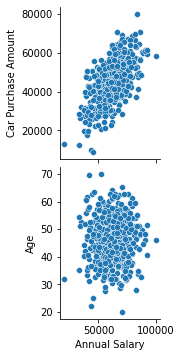

In [5]:
# sns.pairplot(car_data)
sns.pairplot(car_data,x_vars=['Annual Salary'], y_vars=['Car Purchase Amount','Age'])

You can actually mention the plotting x-variable & y-variable using the Seaborn 

In [6]:
# input = car_data.drop(['Customer Name','Customer e-mail', 'Country', 'Gender'],axis=1)
Input = car_data.drop(['Customer Name','Customer e-mail', 'Country', 'Car Purchase Amount' ],axis=1)

In [7]:
Input.head(20)

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671
5,1,56.824893,68499.85162,14179.472440,428485.3604
6,1,46.607315,39814.52200,5958.460188,326373.1812
7,1,50.193016,51752.23445,10985.696560,629312.4041
8,0,46.584745,58139.25910,3440.823799,630059.0274
9,1,43.323782,53457.10132,12884.078680,476643.3544


In [8]:
Output=car_data['Car Purchase Amount'] 

In [9]:
Output

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: Car Purchase Amount, Length: 500, dtype: float64

In [10]:
print(Input.shape)
print(Output.shape)

(500, 5)
(500,)


In [11]:
scaler = MinMaxScaler()
Input_scaled = MinMaxScaler().fit_transform(Input)

In [12]:
Input_scaled

array([[0.        , 0.4370344 , 0.53515116, 0.57836085, 0.22342985],
       [0.        , 0.41741247, 0.58308616, 0.476028  , 0.52140195],
       [1.        , 0.46305795, 0.42248189, 0.55579674, 0.63108896],
       ...,
       [1.        , 0.67886994, 0.61110973, 0.52822145, 0.75972584],
       [1.        , 0.78321017, 0.37264988, 0.69914746, 0.3243129 ],
       [1.        , 0.53462305, 0.51713347, 0.46690159, 0.45198622]])

In [13]:
# print(MinMaxScaler().data_min)
Output = Output.values.reshape(-1,1)
Output_scaled = MinMaxScaler().fit_transform(Output)


In [14]:
Output_scaled

array([[0.37072477],
       [0.50866938],
       [0.47782689],
       [0.82285018],
       [0.66078116],
       [0.67059152],
       [0.28064374],
       [0.54133778],
       [0.54948752],
       [0.4111198 ],
       [0.70486638],
       [0.46885649],
       [0.27746526],
       [0.56702642],
       [0.57056385],
       [0.61996151],
       [0.46217916],
       [0.49157341],
       [0.50188722],
       [0.64545808],
       [0.59339372],
       [0.48453965],
       [0.53860366],
       [0.53007738],
       [0.50814651],
       [0.49841668],
       [0.3966416 ],
       [0.56467566],
       [0.6950749 ],
       [0.49287831],
       [0.12090943],
       [0.50211776],
       [0.80794216],
       [0.62661214],
       [0.43394857],
       [0.60017103],
       [0.42223485],
       [0.01538345],
       [0.37927499],
       [0.64539707],
       [0.51838974],
       [0.45869677],
       [0.26804521],
       [0.2650104 ],
       [0.84054134],
       [0.84401542],
       [0.35515157],
       [0.406

In [15]:
input_train, input_test, output_train, output_test = train_test_split(Input_scaled,Output_scaled,test_size = 0.25)

In [16]:
input_train.shape

(375, 5)

In [17]:
model = Sequential([
           Dense(30, activation = 'relu',input_dim = 5),
           Dense(50, activation = 'relu'),
           Dense(1, activation = 'linear'),

])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                180       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                1550      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer = 'adam', loss = 'mean_absolute_error')

In [20]:
history = model.fit(input_train,output_train,batch_size=25,epochs=20,verbose=1,validation_split=0.2)

Epoch 1/20
12/12 [==============================] - 1s 14ms/step - loss: 0.3474 - val_loss: 0.1202
Epoch 2/20
12/12 [==============================] - 0s 3ms/step - loss: 0.1029 - val_loss: 0.1200
Epoch 3/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0843 - val_loss: 0.0773
Epoch 4/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0723 - val_loss: 0.0788
Epoch 5/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0683 - val_loss: 0.0697
Epoch 6/20
12/12 [==============================] - 0s 4ms/step - loss: 0.0626 - val_loss: 0.0659
Epoch 7/20
12/12 [==============================] - 0s 4ms/step - loss: 0.0575 - val_loss: 0.0600
Epoch 8/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0518 - val_loss: 0.0546
Epoch 9/20
12/12 [==============================] - 0s 4ms/step - loss: 0.0466 - val_loss: 0.0500
Epoch 10/20
12/12 [==============================] - 0s 3ms/step - loss: 0.0417 - val_loss: 0.0456
Epoch 11/20
12/12 

In [21]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

Text(0.5, 0, 'Epoch Number')

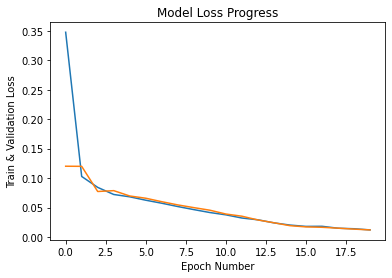

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss Progress')
plt.ylabel('Train & Validation Loss')
plt.xlabel('Epoch Number')

In [23]:
test= np.array([[1, 25, 100000, 0, 75000]])
print(test.shape)
predict = model.predict(test)
print(predict)

(1, 5)
[[80460.36]]
